# Experiment 10: Linear Regression

Apply Linear Regression on Advertising data set that involves advertising expenditures on TV, radio, and newspaper, and the corresponding sales figures.

## Import Libraries

Load the relevent Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import Dataset

Load the relavent dataset and display it

In [2]:
df=pd.read_csv("Data\\Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Spliting Feature and Label

Split feature vectors and labels

In [3]:
y=df["Sales"]
df.drop(["Sales"],axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Cleaning and Preprocessing Data

Clean and preprocess the data to prepare it for the linear regression model. This step may involve handling missing values, encoding categorical variables, and splitting the data into features (X) and target variable (y).

In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
scaler=StandardScaler()
df[['TV','Radio','Newspaper']]=scaler.fit_transform(df[['TV','Radio','Newspaper']])
df.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


## Spliting into Training and Testing data

Split the data into training and testing set

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=26)
len(X_train),len(X_test)

(140, 60)

## Training of model

Instantiate the linear regression model and fit it to the training data. The model will learn the relationship between the features and the target variable

In [8]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Evaluate the trained model using various metrics such as mean squared error (MSE) and coefficient of determination (R^2).


In [9]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse,r2

(3.4134090612952006, 0.84425057938104)

## Model Ploting

Plot a scatter plot of the training set and testing set using the first feature column of X as the x-axis and Y as the y-axis.

Text(0.5, 0, 'Input Feature Columns')

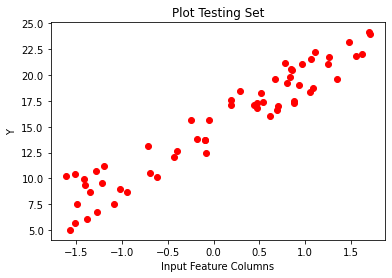

In [10]:
plt.scatter(X_test['TV'],y_pred,color='red')
plt.title("Plot Testing Set")
plt.ylabel('Y')
plt.xlabel('Input Feature Columns')